In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('review_data_subset.csv')

C:\Users\wang-\ML\my_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- vote - helpful votes of the review
- style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)
- image - images that users post after they have received the product

In [88]:
raw.iloc[5, :]

Unnamed: 0                                                  3251995
overall                                                         5.0
verified                                                       True
reviewTime                                              09 23, 2013
reviewerID                                           A249E17QH15NSN
asin                                                     B000WM8IJG
style                                           {'Format:': ' DVD'}
reviewerName                                             Charles 22
reviewText        There is no remastering done here, but the pic...
summary                                     Have Sling, Will Travel
unixReviewTime                                           1379894400
vote                                                              2
image                                                           NaN
Name: 5, dtype: object

In [6]:
raw['style'].nunique()

25

In [12]:
for i in np.unique(np.array(list(raw['style']))):
    print(i)

nan
{'Format:': ' Amazon Instant Video'}
{'Format:': ' Amazon Video'}
{'Format:': ' Audio CD'}
{'Format:': ' Blu-ray'}
{'Format:': ' CD-ROM'}
{'Format:': ' DVD Audio'}
{'Format:': ' DVD'}
{'Format:': ' DVD-R'}
{'Format:': ' DVD-ROM'}
{'Format:': ' Electronics'}
{'Format:': ' HD DVD'}
{'Format:': ' Hardcover'}
{'Format:': ' Interactive DVD'}
{'Format:': ' Kindle Edition'}
{'Format:': ' Laser Disc'}
{'Format:': ' MP3 Music'}
{'Format:': ' Misc.'}
{'Format:': ' Paperback'}
{'Format:': ' Prime Video'}
{'Format:': ' Theatrical Release'}
{'Format:': ' Toy'}
{'Format:': ' UMD for PSP'}
{'Format:': ' VHS Tape'}
{'Format:': ' Video CD'}
{'Size:': ' unknown'}


Ideas: customer segmentation, by the language they use, segment customers. 

In [14]:
raw['summary']

0        She;s The One Everyone Should Want (to be like)
1                                 Cool, Great, Excellent
2                             Tom Cruise?  Always a zero
3                                           Great movie.
4           Lazy script, no suspense in this "thriller".
                              ...                       
99995                           Okay movie, great acting
99996                                    Not Andy's Gang
99997                                         Five Stars
99998                                         Four Stars
99999                                              Villa
Name: summary, Length: 100000, dtype: object

In [85]:
raw['reviewText'].values

array(['Since this is a standup act, i don\'t think theres technically any spoilers to give. But in case i run across something that might make a joke less funny ill put my regular ###s around it so you can skip over that if youd like.\n\n"I\'m The One That I Want" is one of the three dvds of Margaret Chos work that i know of. Ive only seen one other (Notorious C.H.O.) so far while the other im waiting for when im in the mood for some standup again. Ive also seen her on Comedy Central a time or two and watched her tv show "All American Girl". Does it show im a fan? LOL! ;D\n\nBut this was a different Margaret than i had seen before. She had her usual topic that outlines all of her shows: Acceptance. Acceptance for gays, acceptance for Asians, acceptance for overweight people, especially women in her industry. Im not a regular part of any of these worlds (Im pretty average in my weight, im not Asian, and i live in the midwest where if you even have a homosexual thought they crucify you)

In [17]:
raw['vote'].isna().sum()

81212

In [21]:
raw['reviewerID'].nunique()
# This is surprising result. 
# 72947 unique accounts contributed to 100,000 reviews. 

72947

In [23]:
raw['asin'].nunique()

# Okay even more interesting, 100,000 reviews from 72947 customers on 28055 items.

28055

In [24]:
raw['overall'].mean()

4.22225

In [26]:
raw['overall'].value_counts()

5.0    59380
4.0    19691
3.0    10299
1.0     5596
2.0     5034
Name: overall, dtype: int64

- So let's get this straight. Out of 100,000 records, 72,947 customers reviewed them.

- At the same time, there are only 28055 unique items. 

- This means that on average, each item received 3.56 reviews, from 2.6 customers. 

- Maybe it helps to show the distribution of items in number of reviews. 

In [34]:
group_count = raw.groupby(['asin'])['summary'].count()

In [42]:
group_count_df = pd.DataFrame(group_count).sort_values('summary', ascending = False)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
group_count_df.reset_index(inplace = True)

<AxesSubplot:xlabel='asin', ylabel='summary'>

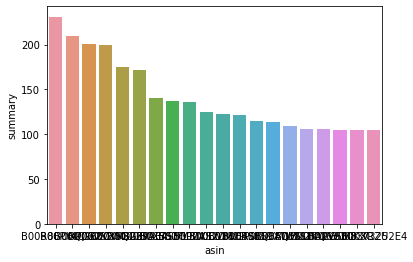

In [55]:
sns.barplot(x = 'asin', y = 'summary', data = group_count_df[: 20])

In [61]:
len(group_count_df[group_count_df['summary'] == 1])
# almost half products only  received 1 review.

13872

In [63]:
reviewer_count = raw.groupby(['reviewerID'])['asin'].count()

In [73]:
reviewer_count_df = pd.DataFrame(reviewer_count).sort_values('asin', ascending = False).reset_index()

In [74]:
reviewer_count_df

reviewerID  asin
0       AV6QDP8Q0ONK4   114
1      A328S9RN3U5M68    71
2       ABO2ZI2Y5DQ9T    69
3      A3LZGLA88K0LA0    61
4       ANCOMAI0I7LVG    57
...               ...   ...
72942  A2ELZ0PVQXMNTS     1
72943  A2EM4TH5AFSSOG     1
72944  A2EMCL2FO637Q2     1
72945  A2EMGKM69QNEQB     1
72946   AZZOSDE61SNHG     1

[72947 rows x 2 columns]

In [75]:
len(reviewer_count_df[reviewer_count_df['asin'] == 1])

58029

In [77]:
58029/72947
# about 80% of customers only provided 1 review.

0.7954953596446735

In [81]:
(100000 - 58029)/ (0.205*72947)
# The rest of customers provided 2.8 reviews/person on average

2.806648462114325

In [99]:
raw['verified'].sum()

73380

In [103]:
raw[raw['verified'] == False]['reviewText']

0        Since this is a standup act, i don't think the...
2        If I could give this a zero, I would.  Tom Cru...
4        David A.R. White plays an FBI agent who finds ...
12       I saw this on TV for the first time not too lo...
23       It definitely takes a little bit of 'orientati...
                               ...                        
99988    This is very innovative science fiction. It is...
99989    Safe House has Denzel Washington return to the...
99990    I do not recomend this movie. It was very slow...
99991    Okay, we understand that a Scooby-Doo mystery ...
99995    Okay the story behind this movie is actually n...
Name: reviewText, Length: 26620, dtype: object

In [4]:
# This model should be simple to implement, we first get data to the designated shape. 
raw = pd.read_csv('review_data_subset.csv')
data = raw[['verified', 'reviewText']]
True_False = {False: 0, True: 1}
data.replace({"verified": True_False}, inplace = True)


C:\Users\wang-\ML\my_env\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
data

verified                                         reviewText
0             0  Since this is a standup act, i don't think the...
1             1  If you are a Don Adams Fan, this is the series...
2             0  If I could give this a zero, I would.  Tom Cru...
3             1  Saw the movie years ago on t.v. when it 1st ca...
4             0  David A.R. White plays an FBI agent who finds ...
...         ...                                                ...
99995         0  Okay the story behind this movie is actually n...
99996         1  Very disappointed. I was expecting the full sh...
99997         1                    great movie, very entertaining!
99998         1  I thought I was most enlightening. It cleared ...
99999         1  This is another good movie starts a little slo...

[100000 rows x 2 columns]

### Try to clean text and vectorize texts.

https://lvngd.com/blog/spacy-word-vectors-as-features-in-scikit-learn/

In [41]:
import spacy
import re
nlp = spacy.load('en_core_web_md')

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', SGDClassifier()),
            ])

In [6]:
corpus = data['reviewText'].values
labels = data['verified'].values

In [55]:
corpus = [str(doc) for doc in corpus]

In [60]:
sent = nlp("He wore a red shirt with gray pants.").vector
sent.shape

(300,)

In [66]:
import time

In [73]:
data_list = []
start = time.time()
n = 0 
for i in corpus:
    data_list.append(nlp(i).vector)
    end = time.time()
    n += 1
    if n % 100 == 0:
        print(f'Finished {n} docs in {round(end - start)} seconds.')
        print(f'Expect to finish in {(100000 - n) / (n/round(end - start))}')

Finished 100 docs in 2 seconds.
Expect to finish in 1998.0
Finished 200 docs in 4 seconds.
Expect to finish in 1996.0
Finished 300 docs in 6 seconds.
Expect to finish in 1994.0
Finished 400 docs in 8 seconds.
Expect to finish in 1992.0
Finished 500 docs in 10 seconds.
Expect to finish in 1990.0
Finished 600 docs in 12 seconds.
Expect to finish in 1988.0
Finished 700 docs in 14 seconds.
Expect to finish in 1986.0
Finished 800 docs in 16 seconds.
Expect to finish in 1984.0
Finished 900 docs in 18 seconds.
Expect to finish in 1982.0
Finished 1000 docs in 20 seconds.
Expect to finish in 1980.0
Finished 1100 docs in 22 seconds.
Expect to finish in 1978.0
Finished 1200 docs in 24 seconds.
Expect to finish in 1976.0
Finished 1300 docs in 26 seconds.
Expect to finish in 1974.0
Finished 1400 docs in 28 seconds.
Expect to finish in 1972.0
Finished 1500 docs in 30 seconds.
Expect to finish in 1970.0
Finished 1600 docs in 32 seconds.
Expect to finish in 1968.0
Finished 1700 docs in 34 seconds.
Exp

Finished 12000 docs in 286 seconds.
Expect to finish in 2097.333333333333
Finished 12100 docs in 289 seconds.
Expect to finish in 2099.4297520661157
Finished 12200 docs in 292 seconds.
Expect to finish in 2101.44262295082
Finished 12300 docs in 295 seconds.
Expect to finish in 2103.3739837398375
Finished 12400 docs in 297 seconds.
Expect to finish in 2098.1612903225805
Finished 12500 docs in 299 seconds.
Expect to finish in 2093.0
Finished 12600 docs in 302 seconds.
Expect to finish in 2094.8253968253966
Finished 12700 docs in 305 seconds.
Expect to finish in 2096.5748031496064
Finished 12800 docs in 307 seconds.
Expect to finish in 2091.4375
Finished 12900 docs in 310 seconds.
Expect to finish in 2093.1007751937987
Finished 13000 docs in 312 seconds.
Expect to finish in 2088.0
Finished 13100 docs in 315 seconds.
Expect to finish in 2089.5801526717555
Finished 13200 docs in 317 seconds.
Expect to finish in 2084.5151515151515
Finished 13300 docs in 320 seconds.
Expect to finish in 2086.

Finished 23100 docs in 610 seconds.
Expect to finish in 2030.6926406926407
Finished 23200 docs in 612 seconds.
Expect to finish in 2025.9310344827586
Finished 23300 docs in 616 seconds.
Expect to finish in 2027.7768240343346
Finished 23400 docs in 619 seconds.
Expect to finish in 2026.2991452991455
Finished 23500 docs in 622 seconds.
Expect to finish in 2024.808510638298
Finished 23600 docs in 625 seconds.
Expect to finish in 2023.3050847457628
Finished 23700 docs in 628 seconds.
Expect to finish in 2021.789029535865
Finished 23800 docs in 631 seconds.
Expect to finish in 2020.2605042016805
Finished 23900 docs in 634 seconds.
Expect to finish in 2018.7196652719665
Finished 24000 docs in 636 seconds.
Expect to finish in 2013.9999999999998
Finished 24100 docs in 639 seconds.
Expect to finish in 2012.4522821576763
Finished 24200 docs in 641 seconds.
Expect to finish in 2007.7603305785124
Finished 24300 docs in 644 seconds.
Expect to finish in 2006.2057613168724
Finished 24400 docs in 647 

Finished 34100 docs in 901 seconds.
Expect to finish in 1741.2287390029326
Finished 34200 docs in 904 seconds.
Expect to finish in 1739.2748538011697
Finished 34300 docs in 906 seconds.
Expect to finish in 1735.399416909621
Finished 34400 docs in 908 seconds.
Expect to finish in 1731.5348837209303
Finished 34500 docs in 910 seconds.
Expect to finish in 1727.6811594202898
Finished 34600 docs in 913 seconds.
Expect to finish in 1725.728323699422
Finished 34700 docs in 917 seconds.
Expect to finish in 1725.6512968299712
Finished 34800 docs in 919 seconds.
Expect to finish in 1721.8045977011495
Finished 34900 docs in 922 seconds.
Expect to finish in 1719.833810888252
Finished 35000 docs in 925 seconds.
Expect to finish in 1717.857142857143
Finished 35100 docs in 927 seconds.
Expect to finish in 1714.025641025641
Finished 35200 docs in 929 seconds.
Expect to finish in 1710.2045454545455
Finished 35300 docs in 934 seconds.
Expect to finish in 1711.8923512747876
Finished 35400 docs in 937 sec

Finished 45000 docs in 1190 seconds.
Expect to finish in 1454.4444444444443
Finished 45100 docs in 1193 seconds.
Expect to finish in 1452.2328159645233
Finished 45200 docs in 1196 seconds.
Expect to finish in 1450.0176991150443
Finished 45300 docs in 1199 seconds.
Expect to finish in 1447.7991169977925
Finished 45400 docs in 1203 seconds.
Expect to finish in 1446.7797356828194
Finished 45500 docs in 1206 seconds.
Expect to finish in 1444.5494505494505
Finished 45600 docs in 1209 seconds.
Expect to finish in 1442.3157894736844
Finished 45700 docs in 1212 seconds.
Expect to finish in 1440.078774617068
Finished 45800 docs in 1215 seconds.
Expect to finish in 1437.8384279475981
Finished 45900 docs in 1218 seconds.
Expect to finish in 1435.5947712418301
Finished 46000 docs in 1221 seconds.
Expect to finish in 1433.3478260869565
Finished 46100 docs in 1224 seconds.
Expect to finish in 1431.0976138828632
Finished 46200 docs in 1227 seconds.
Expect to finish in 1428.844155844156
Finished 46300

Finished 55900 docs in 1509 seconds.
Expect to finish in 1190.4633273703043
Finished 56000 docs in 1512 seconds.
Expect to finish in 1188.0
Finished 56100 docs in 1515 seconds.
Expect to finish in 1185.5347593582887
Finished 56200 docs in 1517 seconds.
Expect to finish in 1182.288256227758
Finished 56300 docs in 1520 seconds.
Expect to finish in 1179.822380106572
Finished 56400 docs in 1522 seconds.
Expect to finish in 1176.5815602836878
Finished 56500 docs in 1525 seconds.
Expect to finish in 1174.1150442477876
Finished 56600 docs in 1527 seconds.
Expect to finish in 1170.8798586572439
Finished 56700 docs in 1530 seconds.
Expect to finish in 1168.4126984126983
Finished 56800 docs in 1532 seconds.
Expect to finish in 1165.1830985915492
Finished 56900 docs in 1535 seconds.
Expect to finish in 1162.7152899824255
Finished 57000 docs in 1537 seconds.
Expect to finish in 1159.4912280701756
Finished 57100 docs in 1539 seconds.
Expect to finish in 1156.2714535901928
Finished 57200 docs in 154

Finished 66800 docs in 1787 seconds.
Expect to finish in 888.1497005988025
Finished 66900 docs in 1789 seconds.
Expect to finish in 885.1405082212257
Finished 67000 docs in 1793 seconds.
Expect to finish in 883.1194029850747
Finished 67100 docs in 1795 seconds.
Expect to finish in 880.1117734724291
Finished 67200 docs in 1797 seconds.
Expect to finish in 877.1071428571429
Finished 67300 docs in 1799 seconds.
Expect to finish in 874.1054977711738
Finished 67400 docs in 1802 seconds.
Expect to finish in 871.5905044510386
Finished 67500 docs in 1805 seconds.
Expect to finish in 869.074074074074
Finished 67600 docs in 1808 seconds.
Expect to finish in 866.5562130177514
Finished 67700 docs in 1810 seconds.
Expect to finish in 863.5598227474151
Finished 67800 docs in 1814 seconds.
Expect to finish in 861.5162241887906
Finished 67900 docs in 1816 seconds.
Expect to finish in 858.5213549337261
Finished 68000 docs in 1820 seconds.
Expect to finish in 856.470588235294
Finished 68100 docs in 1823

Finished 77800 docs in 2081 seconds.
Expect to finish in 593.8071979434447
Finished 77900 docs in 2083 seconds.
Expect to finish in 590.9409499358152
Finished 78000 docs in 2086 seconds.
Expect to finish in 588.3589743589743
Finished 78100 docs in 2089 seconds.
Expect to finish in 585.775928297055
Finished 78200 docs in 2093 seconds.
Expect to finish in 583.470588235294
Finished 78300 docs in 2095 seconds.
Expect to finish in 580.6066411238825
Finished 78400 docs in 2098 seconds.
Expect to finish in 578.0204081632653
Finished 78500 docs in 2100 seconds.
Expect to finish in 575.1592356687898
Finished 78600 docs in 2103 seconds.
Expect to finish in 572.5725190839694
Finished 78700 docs in 2106 seconds.
Expect to finish in 569.9847522236341
Finished 78800 docs in 2108 seconds.
Expect to finish in 567.1269035532995
Finished 78900 docs in 2111 seconds.
Expect to finish in 564.5386565272496
Finished 79000 docs in 2113 seconds.
Expect to finish in 561.6835443037975
Finished 79100 docs in 2115

Finished 88800 docs in 2371 seconds.
Expect to finish in 299.045045045045
Finished 88900 docs in 2373 seconds.
Expect to finish in 296.29133858267716
Finished 89000 docs in 2375 seconds.
Expect to finish in 293.53932584269666
Finished 89100 docs in 2378 seconds.
Expect to finish in 290.91133557800225
Finished 89200 docs in 2381 seconds.
Expect to finish in 288.2825112107623
Finished 89300 docs in 2383 seconds.
Expect to finish in 285.5330347144457
Finished 89400 docs in 2386 seconds.
Expect to finish in 282.903803131991
Finished 89500 docs in 2388 seconds.
Expect to finish in 280.1564245810056
Finished 89600 docs in 2391 seconds.
Expect to finish in 277.5267857142857
Finished 89700 docs in 2393 seconds.
Expect to finish in 274.7814938684504
Finished 89800 docs in 2395 seconds.
Expect to finish in 272.0378619153675
Finished 89900 docs in 2399 seconds.
Expect to finish in 269.5205784204672
Finished 90000 docs in 2402 seconds.
Expect to finish in 266.8888888888889
Finished 90100 docs in 2

Finished 99700 docs in 2646 seconds.
Expect to finish in 7.961885656970913
Finished 99800 docs in 2650 seconds.
Expect to finish in 5.31062124248497
Finished 99900 docs in 2653 seconds.
Expect to finish in 2.6556556556556554
Finished 100000 docs in 2656 seconds.
Expect to finish in 0.0


In [74]:
data_list

[array([-4.15911898e-02,  2.23054528e-01, -1.57439694e-01, -3.70057262e-02,
         6.55188784e-02,  5.18421817e-04,  5.15429527e-02, -1.70509964e-01,
        -9.07095987e-03,  2.20783186e+00, -1.96044102e-01,  5.71005531e-02,
         5.88424392e-02, -9.04172510e-02, -1.18610956e-01, -3.90792936e-02,
        -5.90780787e-02,  9.84880447e-01, -1.84342027e-01, -2.62226649e-02,
         4.08482030e-02, -1.88554656e-02, -7.02470019e-02, -4.07598726e-02,
         2.94698607e-02,  3.80500755e-03, -5.30506112e-02, -8.28204006e-02,
         4.70324531e-02, -6.18655793e-02, -9.12795812e-02,  1.01603232e-01,
        -5.99055812e-02,  4.17984687e-02,  9.10366625e-02, -7.69134313e-02,
         6.91278884e-03,  4.88219447e-02, -1.09179065e-01, -6.45066872e-02,
         6.20926544e-03,  4.02827188e-02,  1.31972069e-02, -5.18529490e-02,
         5.65982498e-02,  8.23776126e-02, -1.70864299e-01, -2.72249524e-02,
         2.30979305e-02, -2.57717706e-02, -7.55825341e-02,  3.44142616e-02,
        -6.3

In [110]:
output = [i.reshape(1, -1) for i in data_list]
concat = np.concatenate(output)
concat_df = pd.DataFrame(np.array(concat))
concat_df.to_csv('vectorized_corpus.csv')

In [3]:
X = pd.read_csv('vectorized_corpus.csv', index_col = 0)
X = X.values

In [28]:
df = pd.DataFrame(list(zip(labels, X)), columns = ['verified', 'vectorized_corpus'])

In [29]:
df

verified                                  vectorized_corpus
0             0  [-0.04159119, 0.22305453, -0.1574397, -0.03700...
1             1  [-0.0496366, 0.19047265, -0.13816105, -0.08261...
2             0  [-0.0017962079, 0.1955904, -0.2369049, -0.1182...
3             1  [0.06441642, 0.14180318, -0.07853054, -0.15346...
4             0  [-0.11315562, 0.14127514, -0.10841337, -0.0463...
...         ...                                                ...
99995         0  [-0.085625075, 0.20519803, -0.06876854, -0.066...
99996         1  [-0.032119334, 0.1274512, -0.18032824, -0.1233...
99997         1  [-0.103506826, 0.23400581, -0.043155167, -0.16...
99998         1  [-0.0061805057, 0.24092951, -0.2087156, -0.172...
99999         1  [-0.0083168605, 0.1707032, -0.16374385, -0.084...

[100000 rows x 2 columns]

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

In [31]:
X_train = train.iloc[:, 1]
X_test = test.iloc[:, 1]
y_train = train.iloc[:, 0]
y_test = test.iloc[:, 0]

In [32]:
y_train

78399    1
66944    0
60879    1
48133    1
99228    1
        ..
18321    1
71002    1
89505    1
31385    1
5387     0
Name: verified, Length: 75000, dtype: int64

In [33]:
X_train

78399    [-0.42625, 0.4431, -0.34517, -0.1326, -0.05816...
66944    [-0.02197384, 0.16924788, -0.10648491, -0.0516...
60879    [-0.03465345, 0.11856352, -0.10504774, -0.1940...
48133    [-0.087076746, 0.10428249, -0.019589428, -0.35...
99228    [-0.019382963, 0.20060031, -0.014510079, -0.09...
                               ...                        
18321    [-0.17752333, 0.11307001, -0.20212668, -0.1123...
71002    [-0.0023109855, 0.23512833, -0.1348729, -0.116...
89505    [-0.069788106, 0.12040278, -0.04152733, -0.103...
31385    [-0.12700838, 0.15605849, -0.27029246, -0.0628...
5387     [-0.05556587, 0.15553212, -0.19566824, -0.0688...
Name: vectorized_corpus, Length: 75000, dtype: object